In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [15]:
california = fetch_california_housing(as_frame=True)

In [16]:
california_df = california.frame

In [17]:
X = california_df[['MedInc']].values
y = california_df['MedHouseVal'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [20]:
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [21]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [22]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [23]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [24]:
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)

Train MSE: 0.6929887977115864
Test MSE: 0.7032732680932144
Train R^2: 0.48159777620556554
Test R^2: 0.46331772769346224


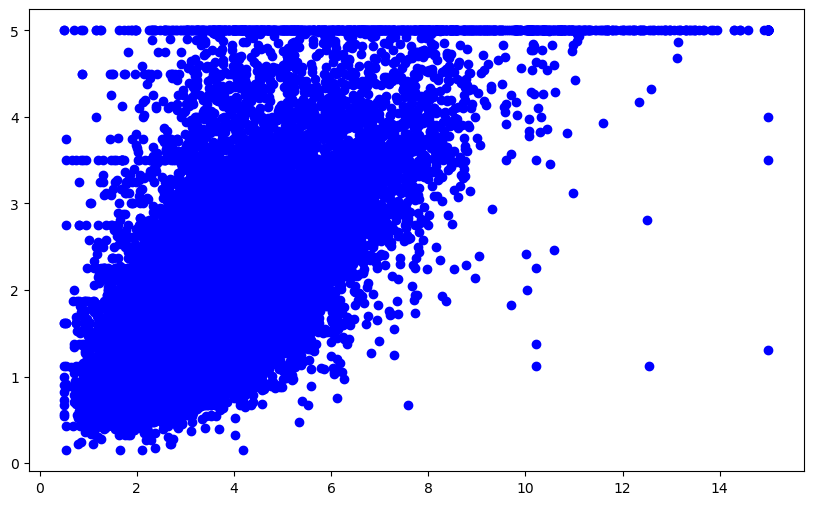

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')

In [26]:
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_seq_poly = poly.transform(X_seq)
X_seq_poly = scaler.transform(X_seq_poly)
y_seq_pred = model.predict(X_seq_poly)

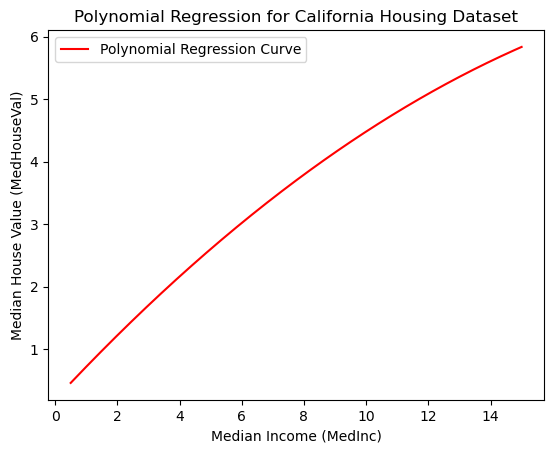

In [27]:
plt.plot(X_seq, y_seq_pred, color='red', label='Polynomial Regression Curve')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value (MedHouseVal)')
plt.title('Polynomial Regression for California Housing Dataset')
plt.legend()
plt.show()